# Perceptrón

Este notebook explica el algoritmo Perceptrón, la unidad básica de las redes neuronales y uno de los primeros algoritmos de aprendizaje automático.

## ¿Qué es el Perceptrón?

El Perceptrón es un algoritmo de aprendizaje supervisado para clasificación binaria. Es un tipo de neurona artificial que puede aprender a clasificar datos linealmente separables.

## Conceptos Fundamentales

- **Neurona artificial**: Modelo matemático que simula una neurona biológica
- **Pesos (w)**: Parámetros que se aprenden durante el entrenamiento
- **Bias (b)**: Término de sesgo que permite ajustar la función de activación
- **Función de activación**: Función que determina la salida (step function, sigmoid, etc.)
- **Separabilidad lineal**: Los datos deben ser linealmente separables para que el algoritmo converja


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


## Modelo del Perceptrón

El Perceptrón calcula:

$$z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b = \sum_{i=1}^{n} w_i x_i + b$$

Y luego aplica una función de activación:

$$y = f(z) = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}$$

Esta es una función de activación escalón (step function).


## Algoritmo de Aprendizaje

El algoritmo de aprendizaje del Perceptrón:

1. **Inicializar** pesos y bias aleatoriamente
2. **Para cada ejemplo de entrenamiento**:
   - Calcular la salida: $y = f(\sum w_i x_i + b)$
   - Si la predicción es incorrecta:
     - Actualizar pesos: $w_i = w_i + \alpha \times (y_{real} - y_{pred}) \times x_i$
     - Actualizar bias: $b = b + \alpha \times (y_{real} - y_{pred})$
3. **Repetir** hasta que no haya errores o se alcance el máximo de iteraciones

Donde $\alpha$ es la tasa de aprendizaje.


In [2]:
class Perceptron:
    """Implementación básica del Perceptrón"""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, random_state=42):
        """
        Parámetros:
        - learning_rate: Tasa de aprendizaje (alpha)
        - n_iterations: Número máximo de iteraciones
        - random_state: Semilla para reproducibilidad
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors = []
    
    def activation_function(self, z):
        """Función de activación escalón"""
        return 1 if z >= 0 else 0
    
    def fit(self, X, y):
        """Entrena el Perceptrón"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Inicializar pesos y bias
        self.weights = np.random.randn(n_features)
        self.bias = 0
        
        # Convertir etiquetas a 0 y 1 si es necesario
        y = np.where(y <= 0, 0, 1)
        
        for iteration in range(self.n_iterations):
            errors_in_iteration = 0
            
            for i in range(n_samples):
                # Calcular salida
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation_function(z)
                
                # Actualizar si hay error
                error = y[i] - y_pred
                if error != 0:
                    self.weights += self.learning_rate * error * X[i]
                    self.bias += self.learning_rate * error
                    errors_in_iteration += 1
            
            self.errors.append(errors_in_iteration)
            
            # Si no hay errores, convergió
            if errors_in_iteration == 0:
                break
    
    def predict(self, X):
        """Hace predicciones"""
        z = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(val) for val in z])


## Ejemplo: Clasificación Binaria


In [3]:
# Generar datos linealmente separables
X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                    n_informative=2, n_clusters_per_class=1,
                                    random_state=42)

# Convertir a clasificación binaria (0 y 1)
y = np.where(y == 0, 0, 1)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Usar nuestra implementación
perceptron_custom = Perceptron(learning_rate=0.01, n_iterations=1000, random_state=42)
perceptron_custom.fit(X_train, y_train)
y_pred_custom = perceptron_custom.predict(X_test)

# Usar scikit-learn
perceptron_sklearn = SklearnPerceptron(max_iter=1000, random_state=42)
perceptron_sklearn.fit(X_train, y_train)
y_pred_sklearn = perceptron_sklearn.predict(X_test)

# Evaluar
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Precisión (Implementación propia): {accuracy_custom:.4f}")
print(f"Precisión (Scikit-learn): {accuracy_sklearn:.4f}")
print(f"\nPesos aprendidos: {perceptron_custom.weights}")
print(f"Bias aprendido: {perceptron_custom.bias:.4f}")


Precisión (Implementación propia): 1.0000
Precisión (Scikit-learn): 1.0000

Pesos aprendidos: [-0.04551891  0.11963939]
Bias aprendido: 0.0700


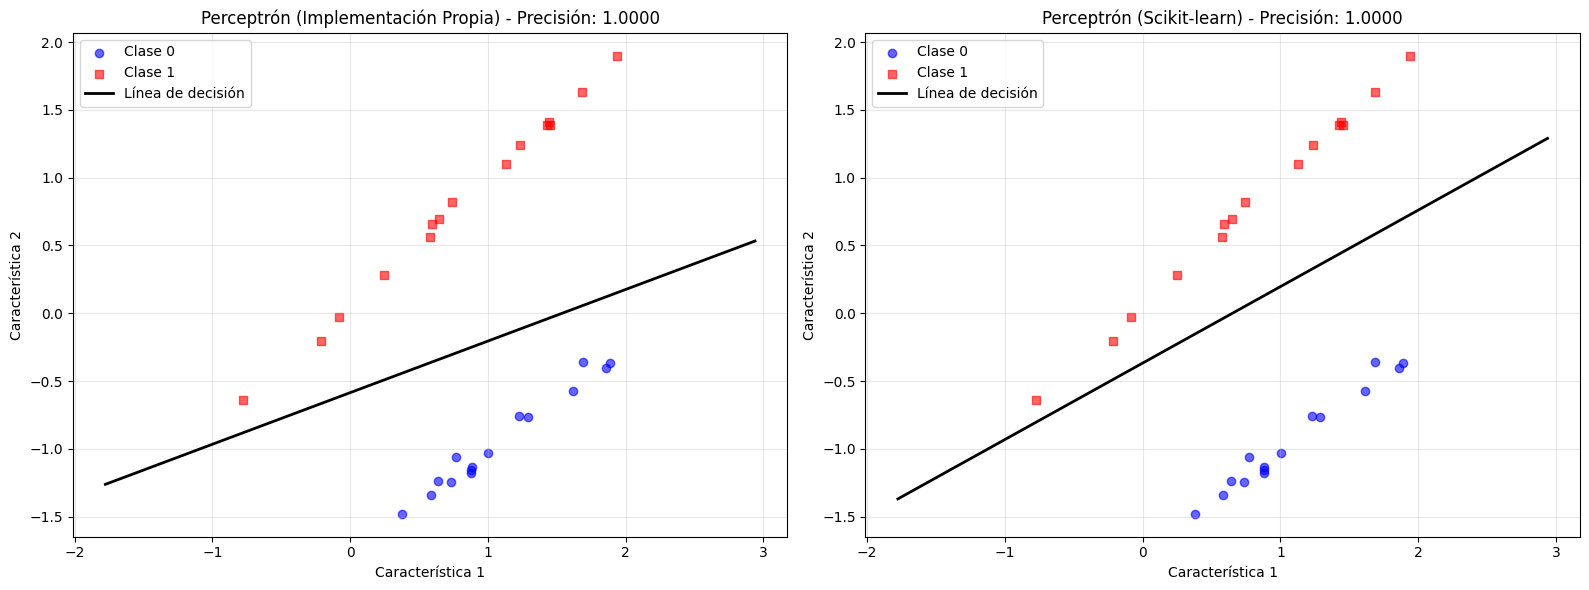

In [4]:
# Visualizar la línea de decisión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Implementación propia
axes[0].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                c='blue', marker='o', label='Clase 0', alpha=0.6)
axes[0].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                c='red', marker='s', label='Clase 1', alpha=0.6)

# Dibujar línea de decisión: w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b) / w2
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x1_line = np.linspace(x1_min, x1_max, 100)
x2_line = -(perceptron_custom.weights[0] * x1_line + perceptron_custom.bias) / perceptron_custom.weights[1]
axes[0].plot(x1_line, x2_line, 'k-', linewidth=2, label='Línea de decisión')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')
axes[0].set_title(f'Perceptrón (Implementación Propia) - Precisión: {accuracy_custom:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scikit-learn
axes[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 
                c='blue', marker='o', label='Clase 0', alpha=0.6)
axes[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 
                c='red', marker='s', label='Clase 1', alpha=0.6)

# Línea de decisión de scikit-learn
x2_line_sklearn = -(perceptron_sklearn.coef_[0][0] * x1_line + perceptron_sklearn.intercept_[0]) / perceptron_sklearn.coef_[0][1]
axes[1].plot(x1_line, x2_line_sklearn, 'k-', linewidth=2, label='Línea de decisión')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].set_title(f'Perceptrón (Scikit-learn) - Precisión: {accuracy_sklearn:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Convergencia del Algoritmo


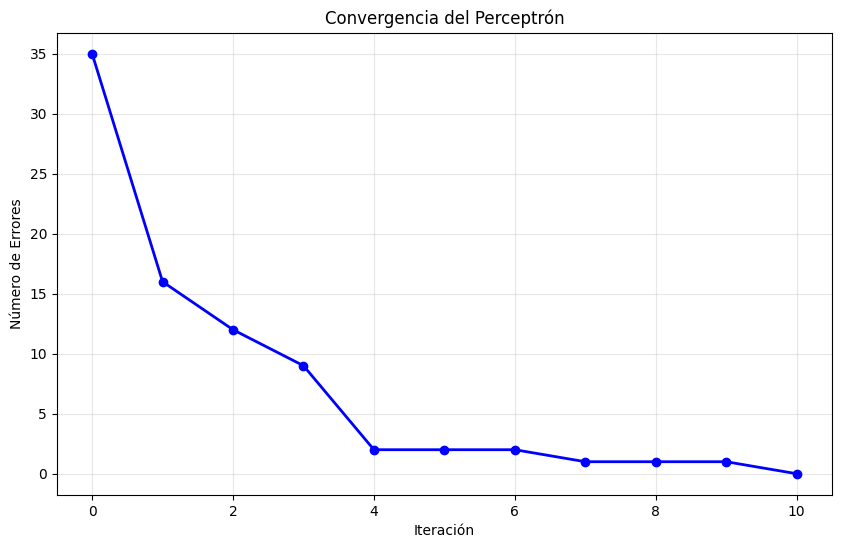

Número de iteraciones hasta convergencia: 11
Total de iteraciones: 1000


In [5]:
# Visualizar número de errores por iteración
plt.figure(figsize=(10, 6))
plt.plot(perceptron_custom.errors, 'b-o', linewidth=2, markersize=6)
plt.xlabel('Iteración')
plt.ylabel('Número de Errores')
plt.title('Convergencia del Perceptrón')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Número de iteraciones hasta convergencia: {len(perceptron_custom.errors)}")
print(f"Total de iteraciones: {perceptron_custom.n_iterations}")


## Limitaciones del Perceptrón Simple

El Perceptrón simple solo puede clasificar datos **linealmente separables**. Si los datos no son linealmente separables, el algoritmo nunca convergerá.

### Ejemplo: Problema XOR (No linealmente separable)


Problema XOR:
Entradas: [[0, 0], [0, 1], [1, 0], [1, 1]]
Salidas esperadas: [0 1 1 0]
Salidas predichas: [1 0 0 0]
Precisión: 0.2500

El Perceptrón simple NO puede resolver el problema XOR
Se necesita una red multicapa (MLP) para problemas no lineales


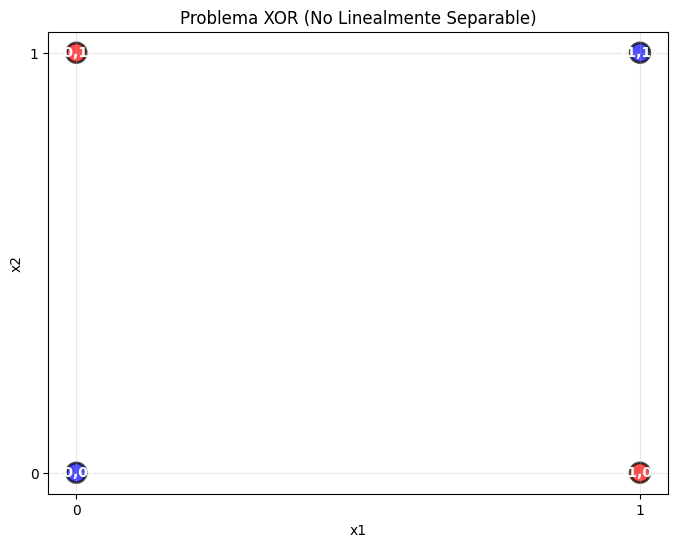

In [6]:
# Problema XOR (no linealmente separable)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR: 0, 1, 1, 0

# Intentar entrenar el Perceptrón
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100, random_state=42)
perceptron_xor.fit(X_xor, y_xor)
y_pred_xor = perceptron_xor.predict(X_xor)

print("Problema XOR:")
print(f"Entradas: {X_xor.tolist()}")
print(f"Salidas esperadas: {y_xor}")
print(f"Salidas predichas: {y_pred_xor}")
print(f"Precisión: {accuracy_score(y_xor, y_pred_xor):.4f}")
print(f"\nEl Perceptrón simple NO puede resolver el problema XOR")
print("Se necesita una red multicapa (MLP) para problemas no lineales")

# Visualizar
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in y_xor]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, alpha=0.7, edgecolors='black', linewidth=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema XOR (No Linealmente Separable)')
plt.grid(True, alpha=0.3)
plt.xticks([0, 1])
plt.yticks([0, 1])
for i, (x, y) in enumerate(X_xor):
    plt.text(x, y, f'({x},{y})', ha='center', va='center', color='white', fontweight='bold')
plt.show()


## Ventajas y Desventajas

**Ventajas:**
- Simple de entender e implementar
- Rápido de entrenar
- Garantiza convergencia si los datos son linealmente separables
- Base para redes neuronales más complejas

**Desventajas:**
- Solo funciona con datos linealmente separables
- No puede resolver problemas no lineales (como XOR)
- Sensible a la tasa de aprendizaje
- Puede no converger si los datos no son separables

## Extensión: Perceptrón Multicapa (MLP)

Para resolver problemas no lineales, se necesita:
- **Múltiples capas** de perceptrones
- **Funciones de activación no lineales** (sigmoid, ReLU, tanh)
- **Backpropagation** para entrenar

## Aplicaciones

- Clasificación binaria simple
- Base para redes neuronales
- Puerta lógica AND/OR
- Filtros lineales
